<a href="https://colab.research.google.com/github/BelKaty/BelKaProject/blob/main/HW2_NN_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mnist
!pip install scikeras[tensorflow]

In [2]:
import numpy as np
import pandas as pd
import mnist
import keras
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [3]:
# import images
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

# Normalize the images.
train_images = (train_images / 255)
test_images = (test_images / 255)

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

In [4]:
to_categorical(test_labels)

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
# Вывод изображения из датасета в виде тензора
train_images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

(-0.5, 27.5, 27.5, -0.5)

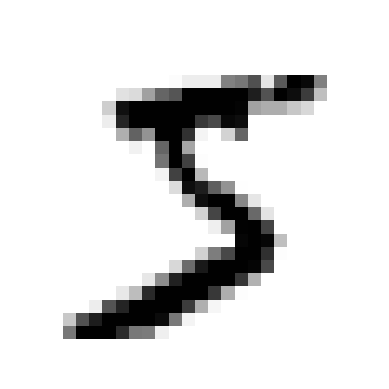

In [7]:
# Вывод изображения из датасета в виде картинки
plt.imshow(mnist.train_images()[0]/255, cmap='binary')
plt.axis('off')

In [9]:
input_shape = (28, 28, 1)

In [10]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [11]:
x_train = x_train / 255
x_test = x_test / 255

In [12]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [21]:
def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(784,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [22]:
# Проверяем как работает наша функция создания модели и смотрим сколько параметров создает каждый из слоев.
model_test = create_model()
model_test.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Обучаем нашу тестовую модель

model_test.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=32,
)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3039 - accuracy: 0.9121
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1399 - accuracy: 0.9585
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1018 - accuracy: 0.9689
Epoch 4/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0816 - accuracy: 0.9746
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0661 - accuracy: 0.9791


In [24]:
# Оцениваем работу модели на тестовых данных через model_test.evaluate.
loss,metrics = model_test.evaluate(
  test_images,
  to_categorical(test_labels)
)
print('----------------------------')
print(f'loss - {np.round(loss,4)}, metrics - {np.round(metrics,4)}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0904 - accuracy: 0.9727
----------------------------
loss - 0.0904, metrics - 0.9727


In [26]:
# Задание параметров для поиска GridSearchCV - поиск оптимальных параметров для нейронной сети.
param_grid = {'batch_size': [64, 128, 256],
              'epochs': [5, 10, 15],
              'optimizer': ['adam', 'sgd', 'rmsprop']}

In [27]:
# Создание экземпляра модели KerasClassifier и подбираем оптимальные параметры нейросети.
model = KerasClassifier(create_model)

grid = GridSearchCV(model, param_grid, refit = False, cv = 3, scoring = 'accuracy')

grid_result = grid.fit(train_images, to_categorical(train_labels))

print(grid_result.best_score_, grid_result.best_params_)

Epoch 1/5
625/625 [==============================] - 3s 3ms/step - loss: 0.4040 - accuracy: 0.8822
Epoch 2/5
625/625 [==============================] - 2s 3ms/step - loss: 0.1795 - accuracy: 0.9480
Epoch 3/5
625/625 [==============================] - 2s 3ms/step - loss: 0.1320 - accuracy: 0.9619
Epoch 4/5
625/625 [==============================] - 2s 3ms/step - loss: 0.1055 - accuracy: 0.9685
Epoch 5/5
313/313 [==============================] - 2s 4ms/step
Epoch 1/5
625/625 [==============================] - 3s 3ms/step - loss: 0.4138 - accuracy: 0.8824
Epoch 2/5
625/625 [==============================] - 2s 3ms/step - loss: 0.1691 - accuracy: 0.9513
Epoch 3/5
625/625 [==============================] - 2s 3ms/step - loss: 0.1245 - accuracy: 0.9635
Epoch 4/5
625/625 [==============================] - 2s 3ms/step - loss: 0.0982 - accuracy: 0.9706
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
Epoch 1/5
625/625 [==============================] - 3s 3ms/step - loss: 0.417

In [28]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.967317 using {'batch_size': 128, 'epochs': 15, 'optimizer': 'rmsprop'}


Оптимальные параметры под текущую архитектуру - 0.9673166666666667

In [29]:
# Используя оптимальные параметры, изменим архитектуру нейросети с добавлением большего количества нейронов.
model_hight = keras.Sequential([

    keras.Input(shape=input_shape),
    Flatten(),
    Dense(90, activation = 'relu'),
    Dense(60, activation = 'relu'),
    Dense(10, activation = 'softmax')
    ] )

In [30]:
model_hight.compile(optimizer='RMSprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [31]:
%%time

history = model_hight.fit(x_train, y_train_cat, batch_size=128, epochs=15)

Epoch 1/15
469/469 [==============================] - 3s 5ms/step - loss: 0.3584 - accuracy: 0.8988
Epoch 2/15
469/469 [==============================] - 4s 8ms/step - loss: 0.1524 - accuracy: 0.9555
Epoch 3/15
469/469 [==============================] - 4s 8ms/step - loss: 0.1091 - accuracy: 0.9674
Epoch 4/15
469/469 [==============================] - 4s 9ms/step - loss: 0.0859 - accuracy: 0.9747
Epoch 5/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0699 - accuracy: 0.9788
Epoch 6/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0577 - accuracy: 0.9822
Epoch 7/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0497 - accuracy: 0.9845
Epoch 8/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0425 - accuracy: 0.9872
Epoch 9/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0360 - accuracy: 0.9888
Epoch 10/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0317 - accuracy: 0.9905

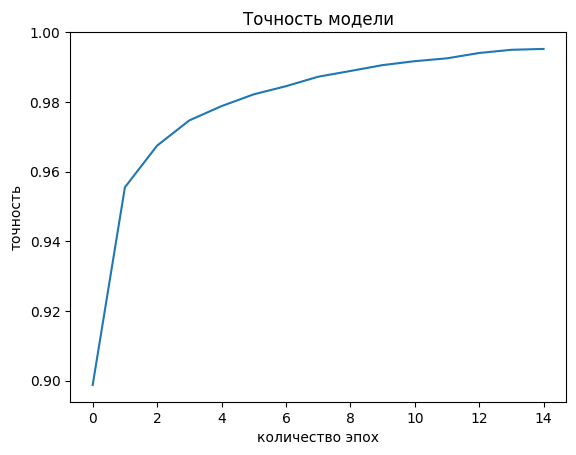

In [32]:
plt.plot(history.history['accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.show()

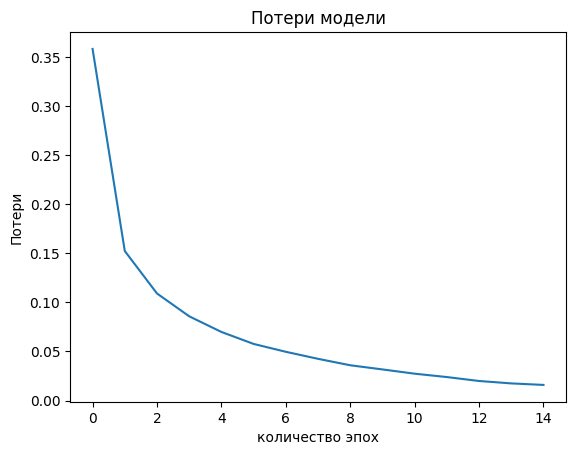

In [33]:
plt.plot(history.history['loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.show()

In [34]:
model_hight.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0872 - accuracy: 0.9779


[0.0871782973408699, 0.9779000282287598]

In [35]:
%%time

history = model_hight.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_data =(x_test, y_test_cat) )

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0263 - accuracy: 0.9917 - val_loss: 0.1116 - val_accuracy: 0.9727
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0246 - accuracy: 0.9922 - val_loss: 0.1136 - val_accuracy: 0.9763
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0237 - accuracy: 0.9924 - val_loss: 0.1261 - val_accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0235 - accuracy: 0.9926 - val_loss: 0.1195 - val_accuracy: 0.9764
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0192 - accuracy: 0.9939 - val_loss: 0.1318 - val_accuracy: 0.9756
CPU times: user 44.3 s, sys: 2.34 s, total: 46.6 s
Wall time: 44.3 s


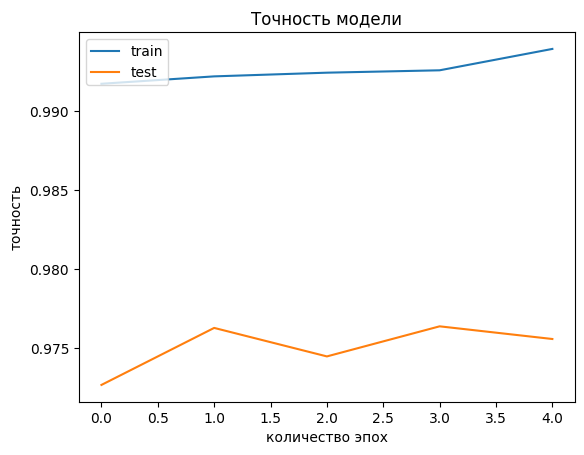

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

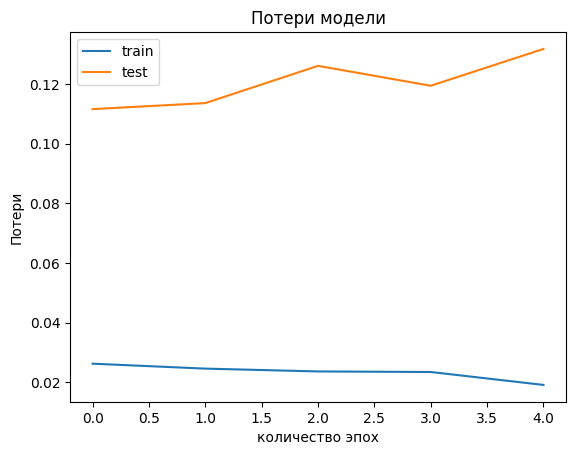

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [38]:
model_low = keras.Sequential([

    keras.Input(shape=input_shape),
    Flatten(),
    Dense(32, activation = 'relu'),
    Dense(16, activation = 'relu'),
    Dense(10, activation = 'softmax')
    ] )

In [39]:
model_low.compile(optimizer='RMSprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [40]:
%%time

history = model_low.fit(x_train, y_train_cat, batch_size=128, epochs=15)

Epoch 1/15
469/469 [==============================] - 2s 3ms/step - loss: 0.5438 - accuracy: 0.8472
Epoch 2/15
469/469 [==============================] - 2s 4ms/step - loss: 0.2365 - accuracy: 0.9331
Epoch 3/15
469/469 [==============================] - 2s 3ms/step - loss: 0.1863 - accuracy: 0.9466
Epoch 4/15
469/469 [==============================] - 1s 3ms/step - loss: 0.1580 - accuracy: 0.9540
Epoch 5/15
469/469 [==============================] - 2s 3ms/step - loss: 0.1385 - accuracy: 0.9595
Epoch 6/15
469/469 [==============================] - 2s 5ms/step - loss: 0.1240 - accuracy: 0.9643
Epoch 7/15
469/469 [==============================] - 1s 3ms/step - loss: 0.1130 - accuracy: 0.9666
Epoch 8/15
469/469 [==============================] - 1s 3ms/step - loss: 0.1037 - accuracy: 0.9693
Epoch 9/15
469/469 [==============================] - 1s 3ms/step - loss: 0.0957 - accuracy: 0.9711
Epoch 10/15
469/469 [==============================] - 2s 3ms/step - loss: 0.0890 - accuracy: 0.9735

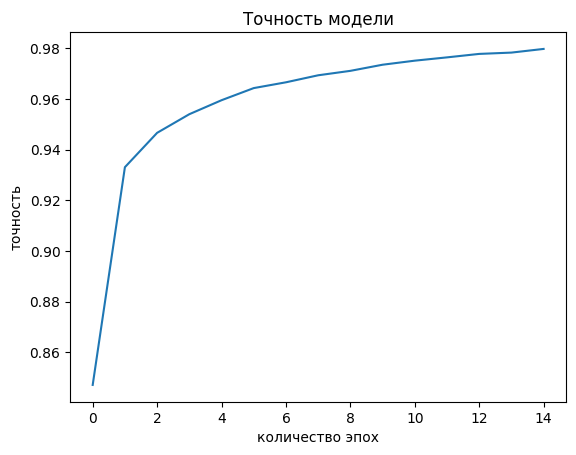

In [41]:
plt.plot(history.history['accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.show()

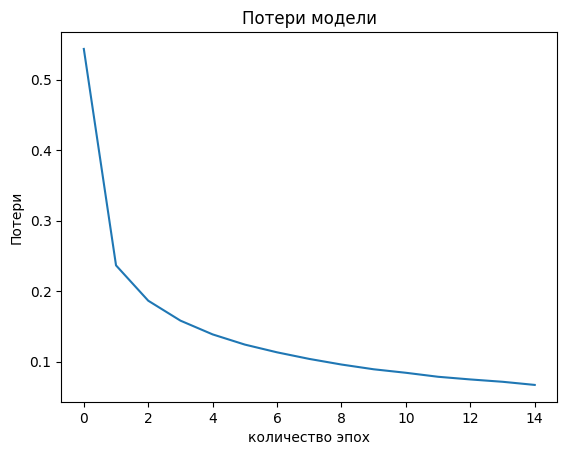

In [42]:
plt.plot(history.history['loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.show()

In [43]:
model_low.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.1119 - accuracy: 0.9680


[0.11193370074033737, 0.9679999947547913]

In [44]:
%%time

history = model_low.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_data =(x_test, y_test_cat) )

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0751 - accuracy: 0.9772 - val_loss: 0.1051 - val_accuracy: 0.9704
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0736 - accuracy: 0.9776 - val_loss: 0.1206 - val_accuracy: 0.9662
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0702 - accuracy: 0.9784 - val_loss: 0.1320 - val_accuracy: 0.9645
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0674 - accuracy: 0.9788 - val_loss: 0.1300 - val_accuracy: 0.9652
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0662 - accuracy: 0.9801 - val_loss: 0.1140 - val_accuracy: 0.9699
CPU times: user 30.3 s, sys: 1.66 s, total: 32 s
Wall time: 41.4 s


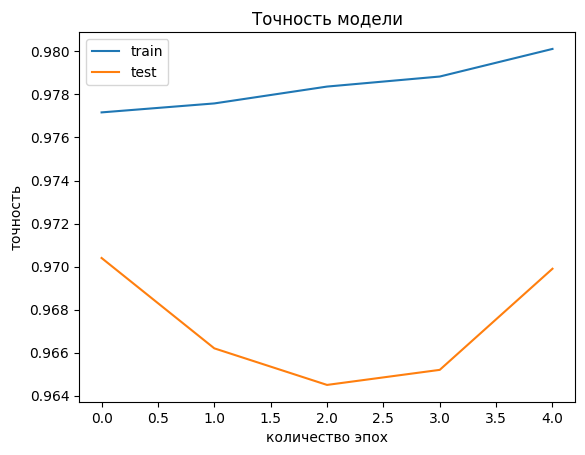

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

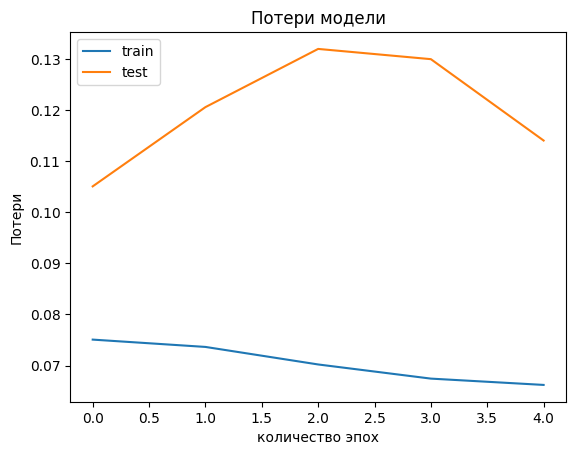

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Мы видим, что при меньшем количестве нейронов предсказательная модель хорошо работает, но все же хуже, чем при большем количестве параметров. Скрытый слой сделал модель более эффективной.